<a href="https://colab.research.google.com/github/mirazAL/TBFC_2021/blob/main/Scratch_TBFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Tue Aug 10 17:25:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os

s='/content/drive/MyDrive/Traditional Food Classification/set 1/train_noise_and_noise_rot15_flipv/'
c=0

for f in os.listdir(s):
  c+=len(os.listdir(s+f))
  print(f,len(os.listdir(s+f)))

print(c)

কালা ভুনা 258
পান্তা ইলিশ 219
বিরিয়ানি 423
খিচুড়ি 516
ডিম ভুনা 303
ফুচকা 468
মিষ্টি,রসগোল্লা 432
2619


In [ ]:
import tensorflow as tf
import numpy as np
import glob,os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization,Activation
from tensorflow.keras.regularizers import l2

In [ ]:
classes=os.listdir('/content/drive/MyDrive/Traditional Food Classification/set 1/train_noise_and_noise_rot15_flipv/')
classes

['কালা ভুনা',
 'পান্তা ইলিশ',
 'বিরিয়ানি',
 'খিচুড়ি',
 'ডিম ভুনা',
 'ফুচকা',
 'মিষ্টি,রসগোল্লা']

In [ ]:
train_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.25,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    )

val_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    )

In [ ]:
train_dir='/content/drive/MyDrive/Traditional Food Classification/set 1/train_noise_and_noise_rot15_flipv/'
train=train_data_aug.flow_from_directory(directory=train_dir,
        target_size=(224, 224),
        batch_size=32,
        color_mode="rgb",
        shuffle=True,
        classes=classes,
        class_mode='categorical')

Found 2619 images belonging to 7 classes.


In [ ]:
valid_dir='/content/drive/MyDrive/Traditional Food Classification/set 1/validation'
valid=val_data_aug.flow_from_directory(directory=valid_dir,
        target_size=(224, 224),
        batch_size=36,
        color_mode="rgb",
        shuffle=False,
        classes=classes,
        class_mode='categorical')

Found 216 images belonging to 7 classes.


In [ ]:
import os

s='/content/drive/MyDrive/Traditional Food Classification/set 1/validation/'
c=0

for f in os.listdir(s):
  c+=len(os.listdir(s+f))
  print(f,len(os.listdir(s+f)))

print(c)

খিচুড়ি 43
কালা ভুনা 21
ডিম ভুনা 25
মিষ্টি,রসগোল্লা 36
পান্তা ইলিশ 18
বিরিয়ানি 35
ফুচকা 39
217


In [ ]:
# type(valid.labels)
import collections, numpy
collections.Counter(valid.labels)

Counter({0: 21, 1: 18, 2: 35, 3: 43, 4: 25, 5: 38, 6: 36})

In [ ]:
labels=['Kala_Vuna','Panta Ilish','Biriyani','Khichuri','Dim_Vuna','Fuchka','Rosogolla']

In [ ]:
model = Sequential()

input_shape=(224, 224, 3)

model.add(Conv2D(32, (3, 3), strides=(1, 1),activation='relu', padding='same',input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), strides=(1, 1),activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (5, 5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add((Dense(128,activation='relu')))
model.add(Dropout(0.4))
# model.add((Dense(256,activation='relu')))

model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       2

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop

model.compile(loss='logcosh',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = '/content/drive/MyDrive/Traditional Food Classification/set 1/scratch_val_acc{val_accuracy:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train,validation_data=valid,shuffle=True,epochs=100,verbose=1,callbacks=[checkpoint])

Epoch 1/100
82/82 [==============================] - 706s 9s/step - loss: 0.0548 - accuracy: 0.2124 - val_loss: 0.0488 - val_accuracy: 0.3194

Epoch 00001: val_accuracy improved from -inf to 0.31944, saving model to /content/drive/MyDrive/Traditional Food Classification/set 1/scratch_val_acc0.319.h5
Epoch 2/100
82/82 [==============================] - 58s 712ms/step - loss: 0.0499 - accuracy: 0.3317 - val_loss: 0.0443 - val_accuracy: 0.3889

Epoch 00002: val_accuracy improved from 0.31944 to 0.38889, saving model to /content/drive/MyDrive/Traditional Food Classification/set 1/scratch_val_acc0.389.h5
Epoch 3/100
82/82 [==============================] - 58s 711ms/step - loss: 0.0464 - accuracy: 0.4085 - val_loss: 0.0392 - val_accuracy: 0.5278

Epoch 00003: val_accuracy improved from 0.38889 to 0.52778, saving model to /content/drive/MyDrive/Traditional Food Classification/set 1/scratch_val_acc0.528.h5
Epoch 4/100
82/82 [==============================] - 58s 707ms/step - loss: 0.0432 - ac

In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
json_file = open('/content/drive/MyDrive/Traditional Food Classification/set 1/scratch_86%.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Traditional Food Classification/set 1/scratch_val_acc0.861.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
# y_true = np.array([np.where(label[0][i] == 1)[0][0] for i in range(216)])
# y_true.shape
y_true=valid.labels
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = loaded_model.predict_generator(valid, 6)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
print('Confusion Matrix')
conf_mat=confusion_matrix(y_true, y_pred)
print(conf_mat)
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=['Kala_Vuna','Panta_Ilish','Biriyani','Khichuri','Dim_Vuna','Fuchka','Rosogolla']))

Confusion Matrix
[[21  0  0  0  0  0  0]
 [ 0 12  2  1  0  3  0]
 [ 0  0 30  4  1  0  0]
 [ 0  0  2 40  1  0  0]
 [ 1  0  0  1 22  1  0]
 [ 0  1  5  3  0 29  0]
 [ 0  0  1  0  0  3 32]]
Classification Report
              precision    recall  f1-score   support

   Kala_Vuna       0.95      1.00      0.98        21
 Panta_Ilish       0.92      0.67      0.77        18
    Biriyani       0.75      0.86      0.80        35
    Khichuri       0.82      0.93      0.87        43
    Dim_Vuna       0.92      0.88      0.90        25
      Fuchka       0.81      0.76      0.78        38
   Rosogolla       1.00      0.89      0.94        36

    accuracy                           0.86       216
   macro avg       0.88      0.86      0.86       216
weighted avg       0.87      0.86      0.86       216



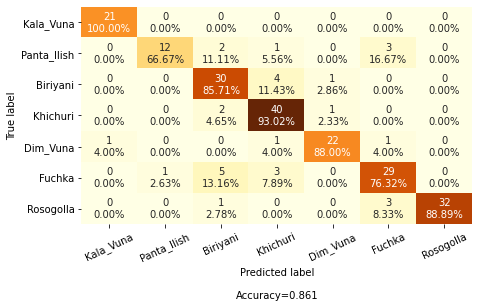

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,group_names=None,categories='auto', count=True,percent=True,cbar=True,xyticks=True,
                          xyplotlabels=True,sum_stats=True,figsize=None,cmap='Blues', title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        # group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
        # group_percentages = ["{0:.2%}".format(value) for value in np.array([cf/np.sum(cf) for cf in cf]).flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in np.array([cnf/np.sum(cnf) for cnf in cf]).flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))

        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.yticks(rotation=0)
        plt.xlabel('Predicted label' + stats_text)
        plt.xticks(rotation=25)
        plt.savefig('conf.jpeg',dpi=600)
    else:
        plt.xlabel(stats_text)
        plt.yticks(rotation=0)
        plt.xticks(rotation=25)
        plt.savefig('conf.jpeg',dpi=600)
    if title:
        plt.title(title)
        plt.yticks(rotation=0)
        plt.xticks(rotation=25)
        plt.savefig('conf.jpeg',dpi=600)

make_confusion_matrix(conf_mat, figsize=(7,4),percent=True,count=True,
                      categories=['Kala_Vuna','Panta_Ilish','Biriyani','Khichuri','Dim_Vuna','Fuchka','Rosogolla'],
                      cbar=False,cmap='YlOrBr')


## Final Scratch Model (86% accuracy)

### Classes

In [ ]:
classes=os.listdir('/content/drive/MyDrive/Traditional Food Classification/set 1/train_noise_and_noise_rot15_flipv/')
classes

['কালা ভুনা',
 'পান্তা ইলিশ',
 'বিরিয়ানি',
 'খিচুড়ি',
 'ডিম ভুনা',
 'ফুচকা',
 'মিষ্টি,রসগোল্লা']

### Pre-processing

In [ ]:
train_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.25,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    )

val_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    )

#### Train data

In [ ]:
train_dir='/content/drive/MyDrive/Traditional Food Classification/set 1/train_noise_and_noise_rot15_flipv/'
train=train_data_aug.flow_from_directory(directory=train_dir,
        target_size=(224, 224),
        batch_size=32,
        color_mode="rgb",
        shuffle=True,
        classes=classes,
        class_mode='categorical')

Found 2619 images belonging to 7 classes.


#### Test data

In [ ]:
valid_dir='/content/drive/MyDrive/Traditional Food Classification/set 1/validation'
valid=val_data_aug.flow_from_directory(directory=valid_dir,
        target_size=(224, 224),
        batch_size=36,
        color_mode="rgb",
        shuffle=False,
        classes=classes,
        class_mode='categorical')

Found 216 images belonging to 7 classes.


### Model

In [ ]:
model = Sequential()

input_shape=(224, 224, 3)

model.add(Conv2D(32, (3, 3), strides=(1, 1),activation='relu', padding='same',input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), strides=(1, 1),activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (5, 5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add((Dense(128,activation='relu')))
model.add(Dropout(0.4))
# model.add((Dense(256,activation='relu')))

model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       2

#### Compiling hyperparameters

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop

model.compile(loss='logcosh',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

### Model Training

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = '/content/drive/MyDrive/Traditional Food Classification/set 1/scratch_val_acc{val_accuracy:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train,validation_data=valid,shuffle=True,epochs=100,verbose=1,callbacks=[checkpoint])

Epoch 1/100
82/82 [==============================] - 706s 9s/step - loss: 0.0548 - accuracy: 0.2124 - val_loss: 0.0488 - val_accuracy: 0.3194

Epoch 00001: val_accuracy improved from -inf to 0.31944, saving model to /content/drive/MyDrive/Traditional Food Classification/set 1/scratch_val_acc0.319.h5
Epoch 2/100
82/82 [==============================] - 58s 712ms/step - loss: 0.0499 - accuracy: 0.3317 - val_loss: 0.0443 - val_accuracy: 0.3889

Epoch 00002: val_accuracy improved from 0.31944 to 0.38889, saving model to /content/drive/MyDrive/Traditional Food Classification/set 1/scratch_val_acc0.389.h5
Epoch 3/100
82/82 [==============================] - 58s 711ms/step - loss: 0.0464 - accuracy: 0.4085 - val_loss: 0.0392 - val_accuracy: 0.5278

Epoch 00003: val_accuracy improved from 0.38889 to 0.52778, saving model to /content/drive/MyDrive/Traditional Food Classification/set 1/scratch_val_acc0.528.h5
Epoch 4/100
82/82 [==============================] - 58s 707ms/step - loss: 0.0432 - ac

### Predict labels of test data

In [ ]:
# y_true = np.array([np.where(label[0][i] == 1)[0][0] for i in range(216)])
# y_true.shape
y_true=valid.labels
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = loaded_model.predict_generator(valid, 6)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


### Confusion Matrix

In [ ]:
print('Confusion Matrix')
conf_mat=confusion_matrix(y_true, y_pred)
print(conf_mat)

Confusion Matrix
[[21  0  0  0  0  0  0]
 [ 0 12  2  1  0  3  0]
 [ 0  0 30  4  1  0  0]
 [ 0  0  2 40  1  0  0]
 [ 1  0  0  1 22  1  0]
 [ 0  1  5  3  0 29  0]
 [ 0  0  1  0  0  3 32]]


In [ ]:
labels=['Khichuri','Biriyani','Panta Ilish','Dim_Vuna','Kala_Vuna',
        'Fuchka','Rosogolla']

In [ ]:
import numpy as np
conf_mat= np.array([[40,2,0,1,0,0,0],
                    [4,30,0,1,0,0,0],
                    [1,2,12,0,0,3,0],
                    [1,0,0,22,1,1,0],
                    [0,0,0,0,21,0,0],
                    [3,5,1,0,0,29,0],
                    [0,1,0,0,0,3,32]
                    ])

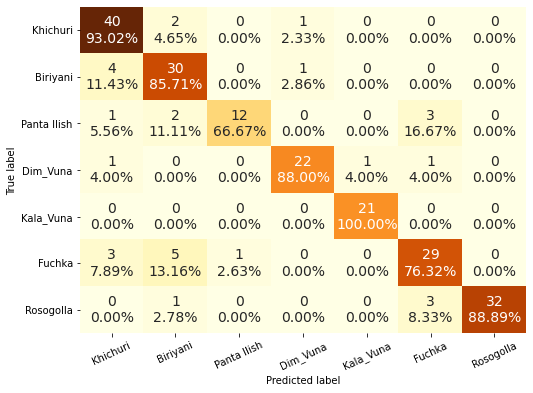

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,group_names=None,categories='auto', count=True,percent=True,cbar=True,xyticks=True,
                          xyplotlabels=True,sum_stats=True,figsize=None,cmap='Blues', accuracy=True,title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        # group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
        # group_percentages = ["{0:.2%}".format(value) for value in np.array([cf/np.sum(cf) for cf in cf]).flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in np.array([cnf/np.sum(cnf) for cnf in cf]).flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    if accuracy==True:
      if sum_stats:
          accuracy  = np.trace(cf) / float(np.sum(cf))

          if len(cf)==2:
              precision = cf[1,1] / sum(cf[:,1])
              recall    = cf[1,1] / sum(cf[1,:])
              f1_score  = 2*precision*recall / (precision + recall)
              stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                  accuracy,precision,recall,f1_score)
          else:
              stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
          stats_text = ""

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,annot_kws={'size':14},xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.yticks(rotation=0)
        plt.xlabel('Predicted label' + stats_text)
        plt.xticks(rotation=25)
        plt.savefig('conf.jpeg',dpi=600)
    else:
        plt.xlabel(stats_text)
        plt.yticks(rotation=0)
        plt.xticks(rotation=25)
        plt.savefig('conf.jpeg',dpi=600)
    if title:
        plt.title(title)
        plt.yticks(rotation=0)
        plt.xticks(rotation=25)
        plt.savefig('conf.jpeg',dpi=600)

make_confusion_matrix(conf_mat, figsize=(8,6),percent=True,count=True,accuracy=False,
                      categories=labels,cbar=False,cmap='YlOrBr')


### Class-wise evaluation metrics

In [ ]:
print('Classification Report')
print(classification_report(y_true, y_pred, 
      target_names=['Kala_Vuna','Panta Ilish','Biriyani','Khichuri','Dim_Vuna','Fuchka','Rosogolla']))

Classification Report
              precision    recall  f1-score   support

   Kala_Vuna       0.95      1.00      0.98        21
 Panta Ilish       0.92      0.67      0.77        18
    Biriyani       0.75      0.86      0.80        35
    Khichuri       0.82      0.93      0.87        43
    Dim_Vuna       0.92      0.88      0.90        25
      Fuchka       0.81      0.76      0.78        38
   Rosogolla       1.00      0.89      0.94        36

    accuracy                           0.86       216
   macro avg       0.88      0.86      0.86       216
weighted avg       0.87      0.86      0.86       216



# Others

In [ ]:
history = model.fit(train,validation_data=valid,shuffle=True,epochs=100,verbose=1,checkpoint=checkpoint)

Epoch 1/100
82/82 [==============================] - 62s 753ms/step - loss: 0.0555 - accuracy: 0.1836 - val_loss: 0.0513 - val_accuracy: 0.3657
Epoch 2/100
82/82 [==============================] - 61s 739ms/step - loss: 0.0507 - accuracy: 0.3162 - val_loss: 0.0455 - val_accuracy: 0.3333
Epoch 3/100
82/82 [==============================] - 61s 742ms/step - loss: 0.0467 - accuracy: 0.3950 - val_loss: 0.0428 - val_accuracy: 0.4722
Epoch 4/100
82/82 [==============================] - 60s 734ms/step - loss: 0.0446 - accuracy: 0.4410 - val_loss: 0.0341 - val_accuracy: 0.5972
Epoch 5/100
82/82 [==============================] - 59s 727ms/step - loss: 0.0405 - accuracy: 0.4953 - val_loss: 0.0344 - val_accuracy: 0.5972
Epoch 6/100
82/82 [==============================] - 59s 727ms/step - loss: 0.0407 - accuracy: 0.5146 - val_loss: 0.0338 - val_accuracy: 0.5972
Epoch 7/100
82/82 [==============================] - 59s 723ms/step - loss: 0.0382 - accuracy: 0.5416 - val_loss: 0.0322 - val_accuracy:

In [ ]:
max(history.history['val_accuracy']),max(history.history['accuracy'])

(0.8611111044883728, 0.9591447114944458)

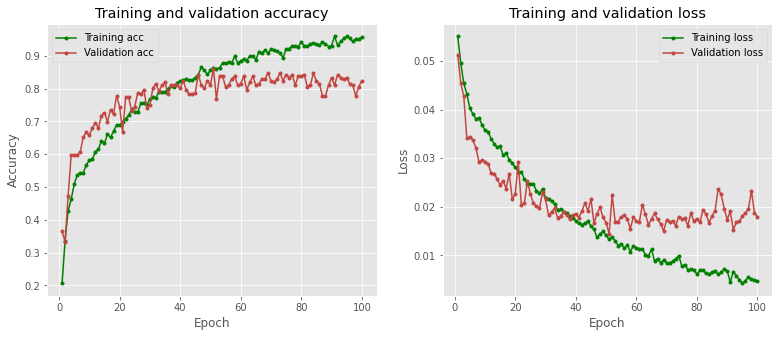

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc',marker = '.',color='#008000')
    plt.plot(x,val_acc, 'r', label='Validation acc',marker = '.',color='#C24641')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss',marker = '.',color='#008000')
    plt.plot(x, val_loss, 'r', label='Validation loss',marker = '.',color='#C24641')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('performance_curve.jpg',dpi=600)

plot_history(history.history)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Traditional Food Classification/set 1/history_scratch_86%', 'wb') as file_pi:
  pickle.dump(history.history, file_pi)

In [ ]:
model_json =model.to_json()
with open("/content/drive/MyDrive/Traditional Food Classification/set 1/scratch_86%.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Traditional Food Classification/set 1//scratch_86.h5")
print("Saved model to disk")

Saved model to disk


## 85% accuracy

In [ ]:
train_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.25,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    )

val_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    )

In [ ]:
model = Sequential()

input_shape=(224, 224, 3)

model.add(Conv2D(32, (3, 3), strides=(1, 1),activation='relu', padding='same',input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), strides=(1, 1),activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (5, 5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add((Dense(128,activation='relu')))
model.add(Dropout(0.2))
# model.add((Dense(256,activation='relu')))

model.add(Dense(7, activation='softmax'))

In [ ]:
history = model.fit(train,validation_data=valid,shuffle=True,epochs=100,verbose=1)

Epoch 1/100
82/82 [==============================] - 690s 8s/step - loss: 0.0549 - accuracy: 0.2089 - val_loss: 0.0469 - val_accuracy: 0.3843
Epoch 2/100
82/82 [==============================] - 63s 772ms/step - loss: 0.0487 - accuracy: 0.3589 - val_loss: 0.0446 - val_accuracy: 0.3843
Epoch 3/100
82/82 [==============================] - 63s 768ms/step - loss: 0.0464 - accuracy: 0.4067 - val_loss: 0.0453 - val_accuracy: 0.4537
Epoch 4/100
82/82 [==============================] - 63s 763ms/step - loss: 0.0437 - accuracy: 0.4698 - val_loss: 0.0390 - val_accuracy: 0.5463
Epoch 5/100
82/82 [==============================] - 62s 761ms/step - loss: 0.0405 - accuracy: 0.5186 - val_loss: 0.0351 - val_accuracy: 0.5741
Epoch 6/100
82/82 [==============================] - 62s 754ms/step - loss: 0.0392 - accuracy: 0.5271 - val_loss: 0.0325 - val_accuracy: 0.6343
Epoch 7/100
82/82 [==============================] - 62s 758ms/step - loss: 0.0394 - accuracy: 0.5355 - val_loss: 0.0292 - val_accuracy: 0

In [ ]:
max(history.history['val_accuracy']),max(history.history['accuracy'])

(0.8472222089767456, 0.9652538895606995)

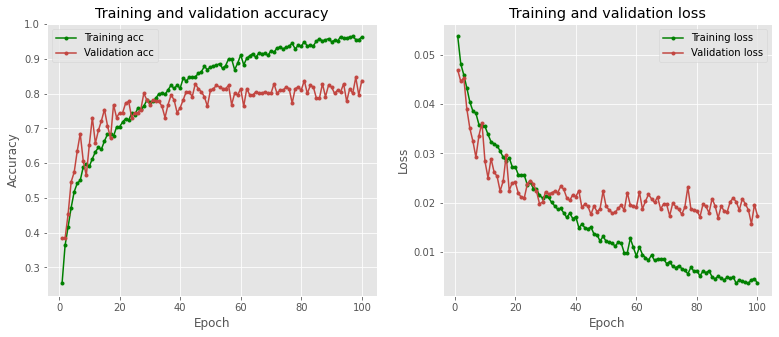

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc',marker = '.',color='#008000')
    plt.plot(x,val_acc, 'r', label='Validation acc',marker = '.',color='#C24641')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss',marker = '.',color='#008000')
    plt.plot(x, val_loss, 'r', label='Validation loss',marker = '.',color='#C24641')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('performance_curve.jpg',dpi=600)

plot_history(history.history)

## 82.4%

In [ ]:
train_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.25,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
    )

val_data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    )

In [ ]:
model = Sequential()

input_shape=(128, 128, 3)

model.add(Conv2D(32, (3, 3), strides=(1, 1),activation='relu', padding='same',input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), strides=(1, 1),activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (5, 5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add((Dense(128,activation='relu')))
model.add(Dropout(0.2))
# model.add((Dense(256,activation='relu')))

model.add(Dense(7, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop

model.compile(loss='logcosh',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train,validation_data=valid,shuffle=True,epochs=100,verbose=1)

Epoch 1/100
82/82 [==============================] - 40s 476ms/step - loss: 0.0546 - accuracy: 0.2174 - val_loss: 0.0463 - val_accuracy: 0.3889
Epoch 2/100
82/82 [==============================] - 38s 464ms/step - loss: 0.0480 - accuracy: 0.3670 - val_loss: 0.0431 - val_accuracy: 0.4306
Epoch 3/100
82/82 [==============================] - 38s 470ms/step - loss: 0.0461 - accuracy: 0.3903 - val_loss: 0.0395 - val_accuracy: 0.5185
Epoch 4/100
82/82 [==============================] - 38s 469ms/step - loss: 0.0426 - accuracy: 0.4759 - val_loss: 0.0343 - val_accuracy: 0.6111
Epoch 5/100
82/82 [==============================] - 38s 463ms/step - loss: 0.0409 - accuracy: 0.5126 - val_loss: 0.0359 - val_accuracy: 0.5602
Epoch 6/100
82/82 [==============================] - 38s 466ms/step - loss: 0.0395 - accuracy: 0.5266 - val_loss: 0.0330 - val_accuracy: 0.6157
Epoch 7/100
82/82 [==============================] - 38s 467ms/step - loss: 0.0383 - accuracy: 0.5545 - val_loss: 0.0312 - val_accuracy:

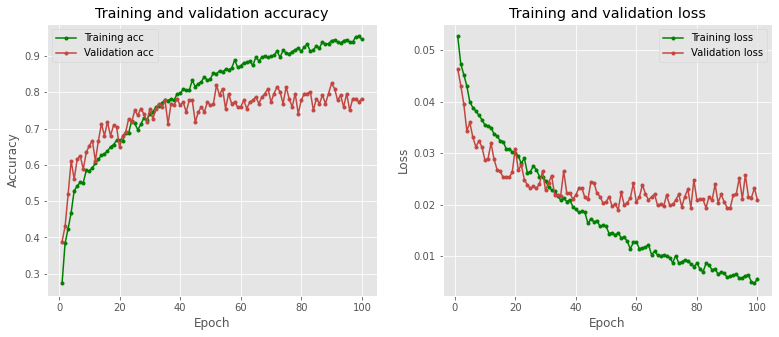

In [ ]:
 import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc',marker = '.',color='#008000')
    plt.plot(x,val_acc, 'r', label='Validation acc',marker = '.',color='#C24641')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss',marker = '.',color='#008000')
    plt.plot(x, val_loss, 'r', label='Validation loss',marker = '.',color='#C24641')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('performance_curve.jpg',dpi=600)

plot_history(history.history)